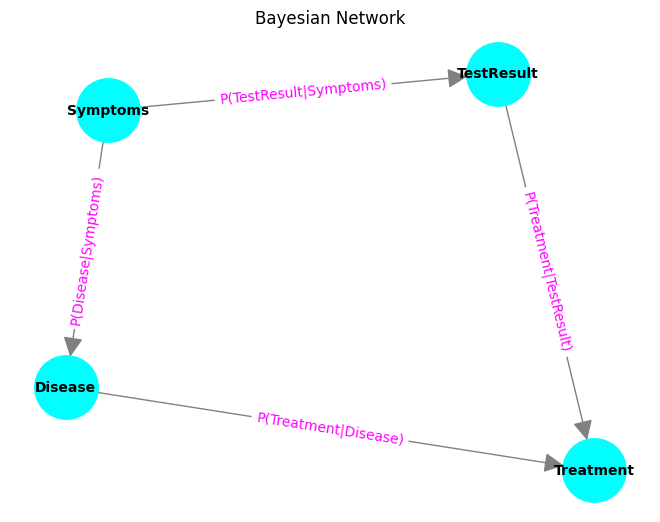

CPDs of the Bayesian Network:
+-------------+-----+
| Symptoms(0) | 0.8 |
+-------------+-----+
| Symptoms(1) | 0.2 |
+-------------+-----+
+------------+-------------+-------------+
| Symptoms   | Symptoms(0) | Symptoms(1) |
+------------+-------------+-------------+
| Disease(0) | 0.9         | 0.1         |
+------------+-------------+-------------+
| Disease(1) | 0.1         | 0.9         |
+------------+-------------+-------------+
+---------------+-------------+-------------+
| Symptoms      | Symptoms(0) | Symptoms(1) |
+---------------+-------------+-------------+
| TestResult(0) | 0.7         | 0.3         |
+---------------+-------------+-------------+
| TestResult(1) | 0.3         | 0.7         |
+---------------+-------------+-------------+
+--------------+---------------+---------------+---------------+---------------+
| Disease      | Disease(0)    | Disease(0)    | Disease(1)    | Disease(1)    |
+--------------+---------------+---------------+---------------+-----------

In [7]:
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

# Create a Directed Graph to represent the Bayesian Network
G = nx.DiGraph()

# Add nodes (variables)
nodes = ['Symptoms', 'Disease', 'TestResult', 'Treatment']
G.add_nodes_from(nodes)

# Add edges (dependencies)
edges = [
    ('Symptoms', 'Disease'),
    ('Symptoms', 'TestResult'),
    ('Disease', 'Treatment'),
    ('TestResult', 'Treatment'),
]
G.add_edges_from(edges)

# Draw the Bayesian Network
pos = nx.spring_layout(G, seed=15)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color='cyan',
    font_size=10,
    font_color='black',
    font_weight='bold',
    arrowsize=30,
    linewidths=2,
    edge_color='gray',
)
# Add conditional probability tables (CPTs) as labels
labels = {
    ('Symptoms', 'Disease'): 'P(Disease|Symptoms)',
    ('Symptoms', 'TestResult'): 'P(TestResult|Symptoms)',
    ('Disease', 'Treatment'): 'P(Treatment|Disease)',
    ('TestResult', 'Treatment'): 'P(Treatment|TestResult)',
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='magenta')
plt.title("Bayesian Network")
plt.show()

# Define Conditional Probability Distributions (CPDs)
cpd_Symptoms = TabularCPD(variable='Symptoms', variable_card=2, values=[[0.8], [0.2]])
cpd_Disease = TabularCPD(
    variable='Disease',
    variable_card=2,
    values=[[0.9, 0.1], [0.1, 0.9]],
    evidence=['Symptoms'],
    evidence_card=[2],
)
cpd_TestResult = TabularCPD(
    variable='TestResult',
    variable_card=2,
    values=[[0.7, 0.3], [0.3, 0.7]],
    evidence=['Symptoms'],
    evidence_card=[2],
)
cpd_Treatment = TabularCPD(
    variable='Treatment',
    variable_card=2,
    values=[
        [0.8, 0.6, 0.4, 0.2],  # Treatment(0)
        [0.2, 0.4, 0.6, 0.8]   # Treatment(1)
    ],
    evidence=['Disease', 'TestResult'],
    evidence_card=[2, 2]  # Both have cardinality 2
)


print("CPDs of the Bayesian Network:")
print(cpd_Symptoms)
print(cpd_Disease)
print(cpd_TestResult)
print(cpd_Treatment)

# Perform direct sampling for a specific event: P(Treatment=1 | Symptoms=1, Disease=1, TestResult=1)
P_Symptoms = cpd_Symptoms.values[1]  # P(Symptoms=1)
P_Disease_given_Symptoms = cpd_Disease.values[1, 1]  # P(Disease=1 | Symptoms=1)
P_TestResult_given_Symptoms = cpd_TestResult.values[1, 1]  # P(TestResult=1 | Symptoms=1)
P_Treatment_given_Disease_and_TestResult = cpd_Treatment.values[1, 1, 1]

# Calculate joint probability of the specific event
Prob_of_SpecificEvent = (
    P_Symptoms
    * P_Disease_given_Symptoms
    * P_TestResult_given_Symptoms
    * P_Treatment_given_Disease_and_TestResult
)

# Print the estimated probabilities
print(f"P(Symptoms=1) = {P_Symptoms}")
print(f"P(Disease=1 | Symptoms=1) = {P_Disease_given_Symptoms}")
print(f"P(TestResult=1 | Symptoms=1) = {P_TestResult_given_Symptoms}")
print(f"P(Treatment=1 | Disease=1, TestResult=1) = {P_Treatment_given_Disease_and_TestResult}")
print(f"Joint Probability of the Specific Event = {Prob_of_SpecificEvent:.4f}")


In [2]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.2 MB/s eta 0:00:00
